<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.polytechnique.edu/sites/all/institutionnel/institutpolytechniqueparis_logohorizontal.png" width="90%"> </td>
     <td style="background-color:transparent;">
<img border="0" src="" width="60%"> </td>
  </tr>
</table> 
</div>
<center><h1>Arabic News Category Prediction Challenge (ANCP)</h1></center>
<br/>
<center>Ahmad CHAMMA, Hadi ABDINE, Youssef FARHAT</center>

## Table of Contents

0. [Introduction](#Introduction)
1. [Motivation](#Motivation)
2. [Business Model](#Business-Model)
3. [KPI and Metric](#KPI-and-Metric)
4. [Data](#Data)
5. [Metric](#Metric)
6. [Data exploaration](#Data-exploration)
7. [Predictions](#Predictions)

# Introduction

| <img src="files/NLP.png" width="400"> | <img src="files/arabic.png" width="400"> |
| - | - |


**Why is Arabic Natural Language Processing important?**

*A computer could be considered intelligent if it could carry on a conversation with a human being without the human realizing they were talking to a machine.<br>-__Alan Turing__*<br><br>

By "natural language", we mean a language that is used for communication by humans. By combining the power of artificial intelligence, computational linguistics and computer science, __Natural Language Processing (NLP)__ helps machines to understand the natural language and communicate with humans in their own language.

With the ongoing growth of the World Wide Web and social media, there is a drastic increase in online data. As the amount of data increases, the mechanisms to process it with its unstructured format and to extract meaningful information from it becomes more challenging. However, the natural language is often ambiguous and the linguistic structure can depend on many complex variables, including slang, regional dialects and social context. And that is why the development of advanced NLP techniques has been a major topic of research in the last decade. 

With NLP, ambiguity in language can be resolved and it adds useful numeric structure to the previously unstructed data. From then, sky is the limit on what can be done and the applications that can be developed. For example, NLP makes it possible for computers to read text, translate it, hear speech, interpret it, measure sentiment and determine which parts are important, and that is just top of the iceberg.

# Motivation

*The Arabic language has surpassed all other languages in beauty and elegance. I am at a loss for words to describe its good qualitites.<br> -__Carlo Alfonso Nallino__*

In this project, we are going to be looking into Arabic Natural Language Processing (ANLP). Arabic is the fifth most spoken language in the world _(according to https://www.fluentin3months.com/most-spoken-languages/)_ and is considered as the official language in 26 countries which qualifies it to be an important langauge. Because of that, a lot of textual data written in arabic language is generated whether it's from social media, a news website or google searches etc... Also, Arabic in its standard form, known as Modern Standard Arabic (MSA), is one of the 6 official languages of the United Nations. 

However, according to Wikipedia (https://en.wikipedia.org/wiki/Languages_used_on_the_Internet), the __Arabic__ content on the Internet doesn't represent more than 0.7%. As Arab people, we are responsable of spreading this beautiful language and introduce it with all the challenges within.

Despite its importance and significance in the world, it has yet to have a major contribution in the NLP applications. Arabic has received comparatively little attention in modern computational linguistics. It is indeed a challenging topic due to the complexity of the language, its rich morphology, as well as the presence many different dialects. But with the constant advancement in the NLP field, as well as deep learning and big data, and with proper research and dedication, the creation of a great ANLP model will be considered a breakthrough in the computational liguistics.


# Business Model

For a local news agency, it will receive hundreds of news per day of multiple category. So, workers are needed to discover the main subject of the news in order to perform the best classification. But why not let the machine do this task? In other words, why not automate it?<br>
One the most challenges faced when working with Arabic language is the limited ressources we could use. In order to perform this NLP work, we need a structured arabic dataset of news unfortunately not present at all over the internet (there is some new works on __Arabic__ with MIT).  So, the first step was to perform some __Crawling__.<br> 
The __Crawling__ was chosen for a website with no legal issues of Lebanese __Arabic__ News. With some basic python script, we were intergrating the html format of each page and taking the most important parts such as title, main text, image link ... <br>
The task to challenge here is to construct a good and robust nlp model in order to give the highest metric possible with the given dataset (a combination of data cleaning, tuning ...)

# KPI and Metric

This predictive model can be integrated in any news providing medium. Some of the benefits and KPIs to help us track the impact of this project:
<ul>
  <li>Trending category shown at first</li>
  <li>Number of users or visits to the medium</li>
  <li>User Satisfaction with the medium integrated</li>
</ul>



# Data

As mentioned before, __Arabic__ text data is hard to be found, and rare to find one already categorized so, the data that we will be using throughout the project is collected from a Lebanese news website www.lebanonfiles.com . This site contains all sorts of news such as economical, political news ... and what made this part challenging is that we had to extract the data ourselves in order to use it.

The data collected:
* `Id`: integer, identifier for the news</li>
* `Title`: string, title of the news which can tell a lot about the category</li>
* `Date`: date type, but written in arabic</li>
* `Desc`: string, description of the news</li>
* `Image`: string, some news may contain an image</li>

## Training and test

The dataset has been split into 'training' and 'test' subsets. The shapes are:

* training: (116 409, 5)
* test: (38 804, 5)

# Metric

One of main challenges added in this work is the imbalanced classification case. For this, we are willing to use as metric the __f1 score__ of sklearn with the parameter __average__ set to weighted. It's a combination of the __f1 score macro__ used for multi-class classification but respecting the imbalanced case.

$$
f1_{score} = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

## Importing the necessary librairies

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import datetime
import dateutil.parser as dparser
import nltk
from nltk.corpus import stopwords
import unicodedata as ud
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Data exploration

In [0]:
from problem import get_train_data
X_df, y_array = get_train_data()

In [43]:
X_df.head(5)

,Id,Title,Date,Desc,Image
0,1313318,تكريم الشاعر موسى زغي ورئيس الجمهورية قلده وسا...,الخميس 12 نيسان 2018 - 15:37,\n\r\n\tكرمت جامعة الروح القدس - الكسليك وجامع...,http://www.lebanonfiles.com/files/images/12-04...
1,1413607,نائب معارض لمادورو: حزب الله يستثمر منجمين للذ...,الاثنين 14 كانون الثاني 2019 - 15:58,\n\n\tكشف نائب معارض للرئيس الفنزويلي نيكولاس ...,http://www.lebanonfiles.com/files/images/14-01...
2,1363260,هكذا استغل داعش الأطفال في هجمات الشيشان,الخميس 23 آب 2018 - 07:29,\n\n\tنشر تنظيم داعش مقطع فيديو، الأربعاء، يظه...,http://www.lebanonfiles.com/files/images/23-08...
3,971779,سلام ترأس اجتماعا لخلية الازمة الوزارية,الاثنين 07 كانون الأول 2015 - 18:48,\n\r\n\tترأس رئيس مجلس الوزراء تمام سلام اجتما...,http://www.lebanonfiles.com/files/images/07-12...
4,960499,كنعان: وصلنا الى اتفاق حول اقتراح قانون استعاد...,الأربعاء 11 تشرين الثاني 2015 - 15:01,"\n\r\n\tعقد نواب من ""التيار الوطني الحر"" والمس...",http://www.lebanonfiles.com/files/images/11-11...


In [44]:
X_df.shape

(116409, 5)

In [45]:
# proportion of NaN values
X_df.isna().sum() / X_df.shape[0]

Id       0.000000
Title    0.000000
Date     0.000000
Desc     0.000807
Image    0.036776
dtype: float64

In [46]:
# number of unique values
X_df.nunique()

Id       116402
Title    115474
Date     111403
Desc     116212
Image    109996
dtype: int64

In [47]:
X_df.dtypes

Id        int64
Title    object
Date     object
Desc     object
Image    object
dtype: object

In [48]:
X_df.describe(include='all')

,Id,Title,Date,Desc,Image
count,1.164090e+05,116409,116409,116315,112128
unique,NaN,115474,111403,116212,109996
top,NaN,الدفاع المدني: مهمات إنقاذ وإسعاف وإخماد حرائق...,الثلاثاء 09 تشرين الأول 2018 - 11:58,\n\r\n\tحافظ الدولار الاميركي في سوق بيروت الم...,http://www.lebanonfiles.com/files/images/19-09...
freq,NaN,141,10,4,8
mean,1.285414e+06,NaN,NaN,NaN,NaN
std,2.239324e+05,NaN,NaN,NaN,NaN
min,9.000010e+05,NaN,NaN,NaN,NaN
25%,9.993410e+05,NaN,NaN,NaN,NaN
50%,1.372597e+06,NaN,NaN,NaN,NaN
75%,1.461524e+06,NaN,NaN,NaN,NaN


### Histogram of the classes

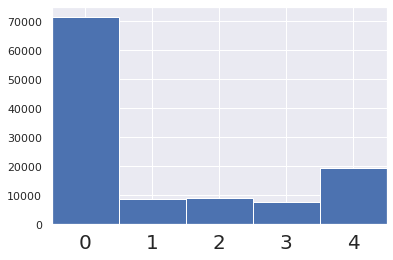

In [49]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

bins = range(6)
plt.hist(y_array, bins=bins)
bins_labels(bins, fontsize=20)
plt.show()

#### As we can see the data is unbalanced so as scorer we use the F1 Score as scorer for our challenge with the parameter average set to 'weighted' to take in consideration the multiclass and the imbalancy of the data as described in the scikit learn documentation.

# Predictions

1. Create a transformer that deals with missing values:

In [0]:
# list of numerical columns
num_cols = ['Id']

In [0]:
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median'))
])

2. Create a transformer to split `Date` into separate year, month, day columns:

In [0]:
def process_date(X):
    date = X.Date.apply(convert_to_date)
    return np.c_[date.dt.year, date.dt.month, date.dt.day]
date_transformer = FunctionTransformer(process_date, validate=False)

3. Process the text in `Title` and `Desc`. We must pay attention that these two columns aren't specified as type string. Therefore, the need to change the type.

* ### Clean the "Desc" and "Title" column (remove \t, weird symbols and stop words)
* ### Convert the arabic date to datetime format

In [0]:
stps_arabic = set(stopwords.words('arabic'))
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def convert_to_date(x):
    dicta =  {"كانون الثاني": "january" ,"شباط": "february", "أيار": "may",  "نيسان": "April",
         "آذار": "march", "حزيران": "june", "تموز": "july", "آب": "august", "أيلول": "september",
         "تشرين الأول": "october", "تشرين الثاني": "november", "كانون الأول": "december",
         "الاثنين": "monday", "الثلاثاء": "tuesday", "الأربعاء": "wednesday", "الخميس": "thursday", "الجمعة": "friday",
         "السبت": "saturday", "الأحد": "sunday", "السبت": "saturday"}
    x_new = x
    for arabic, english in dicta.items():
        x_new = x_new.replace(arabic, english)
    x_new = dparser.parse(x_new, fuzzy=True)
    return x_new

def clean_txt(sent):
    """
        text: a string
        
        return: modified initial string
    """    
    text = sent.strip()
    text = re.sub('[\n\r\t\xa0]', ' ', text)
    text = re.sub(arabic_diacritics, '', text)
    text = ''.join(c for c in text if not ud.category(c).startswith('P') and not c.isdigit())
    res = re.sub(' +', ' ', text)
    return [w for w in text.split() if w not in stps_arabic]

Also, for some news without any description, we will fill naivly the `Title` into the `Desc`.

In [0]:
def process_text(X):
    X['Desc'] = X['Desc'].astype('str')
    X['Title'] = X['Title'].astype('str')
    
    X.loc[X['Desc']=='', 'Desc'] = X['Title']
    X['Desc'] = X['Desc'].apply(clean_txt)
    return np.c_[X['Desc']]

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
import keras.backend as K

# The maximum number of words to be used. (Most frequent)
vocab_size = 20000

# The padding and truncating types used.
trunc_type = 'post'
padding_type = 'post'

# The OOV token (Out Of Vocabulary) will be included within the dictionary
oov_tok = '<OOV>'

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200

# This is fixed.
EMBEDDING_DIM = 100

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    #Class Constructor 
    def __init__(self, feature_names, vocab_size, oov_tok, MAX_SEQUENCE_LENGTH, padding_type, trunc_type):
        self.feature_names = feature_names
        self.tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
        self.max_length = MAX_SEQUENCE_LENGTH
        self.padding = padding_type
        self.truncating = trunc_type
        
    def fit(self, X, y=None):
        X_1 = process_text(X.loc[:, self.feature_names])
        self.tokenizer.fit_on_texts(X_1[:, 0])
        self.word_index = self.tokenizer.word_index
        return self
    
    def transform(self, X):
        X_1 = process_text(X.loc[:, self.feature_names])
        sequences = self.tokenizer.texts_to_sequences(X_1[:, 0])
        X = pad_sequences(sequences, maxlen=self.max_length, padding=self.padding, truncating=self.truncating)
        return X
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

Finally the pipelines for text and non-text components are assembled. 

In [0]:
num_col = ['Id']
date_col = ['Date']
text_cols = ['Desc', 'Title']
drop_cols = ['Image']

non_text_preprocessor = ColumnTransformer(
    transformers=[
        ('date', make_pipeline(date_transformer), date_col),
        ('num', numeric_transformer, num_col),
        ('drop cols', 'drop', drop_cols),
        ])

text_preprocessor = Pipeline(steps=[
    ('text', FeatureSelector(text_cols, vocab_size, oov_tok, MAX_SEQUENCE_LENGTH, padding_type, trunc_type)),
])

In [0]:
# make sure it works
X_train = text_preprocessor.fit_transform(X_df)
X_extra = non_text_preprocessor.fit_transform(X_df)

We will use a Keras model to test with `Desc`:

In [60]:
X_train[10]

array([   35,     7,   173,   590,   139,     6,     3, 10920,  2147,
        2238,  1552,   798,  3759, 16918,    64,   156,     1,  1552,
        1073,  5638,  4688,  1673,  3819,  4387,  2859,   139,    24,
         175,   566,  2668, 11612,   402,  4851,  1552,   798, 10822,
         183,   308,     9,    56,     1,     7,   139,  4851,  1552,
         798,   103,    58,    85,   615,  3042,  4572,     1,  4736,
          27,  1552,   798,  1096,     1,   183,     1,   166, 19210,
        3576,   141,   628,     1,    98,    27,   712,   646,  1623,
         183,     1,     1,     1,  3350,   275,  4387,  2425,     1,
         164,     1,   313,     1,   363,  6535,  1969,  1552,   798,
           1,  5927,  8035,  6730,   139,     1,  3574,  8243,  5404,
          57,   136,    90,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

### To visualize the format of the text used

In [61]:
id_to_word = {value:key for key,value in text_preprocessor['text'].word_index.items()}
id_to_word[0] = '<PAD>'
print(' '.join(id_to_word[id] for id in X_train[10]))
print('---')
print(X_df.loc[10]['Desc'])

قال الرئيس الأميركي دونالد ترامب اليوم ان إدارته تجري محادثات كوريا الجنوبية تزيد تمويلها بشكل كبير <OOV> كوريا الشمالية تصاعد التوترات شبه الجزيرة الكورية وكتب ترامب عبر تويتر مدى العقود العديدة الماضية دفعت كوريا الجنوبية القليل جدا المال العام الماضي <OOV> الرئيس ترامب دفعت كوريا الجنوبية مليون دولار وأضاف بدأت المحادثات لزيادة <OOV> للولايات المتحدة كوريا الجنوبية بلد <OOV> جدا <OOV> الآن بالتزام المساهمة الدفاع العسكري <OOV> الولايات المتحدة العلاقة البلدين جيدة جدا <OOV> <OOV> <OOV> أمني الحرب الكورية انتهت <OOV> وليس <OOV> سلام <OOV> ألف جندي أميركي كوريا الجنوبية <OOV> تهديدات بيونغ يانغ ترامب <OOV> مرارا تكاليف إبقاء القوات الأميركية البلد <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

### Transform y_array to one hot encoding

In [0]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(y_array.reshape(-1, 1))
Y_train = enc.transform(y_array.reshape(-1, 1)).toarray()

In [63]:
y_array

array([1, 4, 4, ..., 4, 1, 3])

In [64]:
Y_train

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Implementing the f1_score function (not integrated in Keras)

In [0]:
def get_f1(y_true, y_pred):
    
    y_true = K.argmax(y_true, -1)
    y_pred = K.argmax(y_pred, -1)
    
    prec_num = 0
    prec_den = 0
    recall_num = 0
    recall_den = 0
    
    equal = K.equal(y_true, y_pred)
    not_equal = K.not_equal(y_true, y_pred)
    
    for i in range(5):
        aux = K.sum(K.cast(K.all(K.stack([equal, K.equal(y_true, i)], axis=0), axis=0), 'int32'))
        prec_num += aux
        prec_den += aux + K.sum(K.cast(K.all(K.stack([not_equal, K.equal(y_pred, i)], axis=0), axis=0), 'int32'))
        recall_num += aux
        recall_den += aux + K.sum(K.cast(K.all(K.stack([not_equal, K.equal(y_true, i)], axis=0), axis=0), 'int32'))
        
    prec_num = K.cast(prec_num, 'float')
    prec_den = K.cast(prec_den, 'float')
    recall_num = K.cast(recall_num, 'float')
    recall_den = K.cast(recall_den, 'float')
    
    precision = prec_num / prec_den
    recall = recall_num / recall_den
    f1_val = 2*(precision * recall)/(precision + recall)
    return f1_val

### Implementing the keras model to use

In [0]:
K.clear_session()

In [0]:
def create_model():
    # create model
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

epochs = 5
batch_size = 64

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

### The summary of the used model. As we ca notice, this model has about 2 millions paramter to train. Thus, it needs a lot of time.

In [69]:
create_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          2000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 2,080,905
Trainable params: 2,080,905
Non-trainable params: 0
_________________________________________________________________


### Cross validation and training of the model

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

clf = Pipeline(steps=[
    ('preprocessing', text_preprocessor),
    ('classifier', model),
    ])

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [72]:
from sklearn.metrics import f1_score

cross_scores = []
for train, test in cv.split(X_df, np.argmax(Y_train, -1)):
    clf.fit(X_df.loc[train], Y_train[train])
    y_pred = clf.predict(X_df.loc[test])
    cross_scores.append(f1_score(np.argmax(Y_train[test], -1), y_pred, average='weighted'))

cross_scores = np.array(cross_scores)
print("mean: %e (+/- %e)" % (cross_scores.mean(), cross_scores.std()))

mean: 9.331061e-01 (+/- 5.956050e-05)


### Finding the F1-Score of the test data-set

In [0]:
from problem import get_test_data
X_test, y_test = get_test_data()

X_test = text_preprocessor.fit_transform(X_test)

In [78]:
f1_score(y_test, model.predict(X_test), average='weighted')

0.521275562697801

### Ramp test

In [79]:
!ramp_test_submission

Testing Arabic News Category prediction
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








	score  f1 score         time
	train     0.528  3158.511521
	valid     0.527   442.220310
	test      0.486   145.573001
CV fold 1
	score  f1 score         time
	train     0.471  1461.698390
	valid     0.469   348.001404
	test      0.464   116.124759
----------------------------
Mean CV scores
----------------------------
	score        f1 score             time
	train  0.499 ± 0.0286  2310.1 ± 848.41
	valid  0.498 ± 0.0292    395.1 ± 47.11
	test   0.475 ± 0.0111    130.8 ± 14.72
----------------------------
Bagged scores
----------------------------
	score  f1 score
	valid     0.502
	test      0.